<img src='http://imgur.com/1ZcRyrc.png' style='float: left; margin: 20px; height: 55px'>

# Capstone Project: H & M Recommender System
## Part 2 - EDA
---
## Contents
---

### [Part 1](part1_hm.ipynb)
1. Introduction
2. Problem Statement
3. Data Import and Cleaning

### [Part 2](part2_hm.ipynb)
4. [Exploratory Data Analysis](#4.-EDA)

### [Part 3](part3_hm.ipynb)
5.  [User-Item Matrix](#5.-User-item Matrix)
6.  [Challenges](#6.-Challenges)
7.  [Conclusion](#7.-Conclusion)


In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from skimage import io
import random
from sklearn.preprocessing import OneHotEncoder

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\msyee\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# reading the files
df = pd.read_csv('../data/articles.csv')
df_customers = pd.read_csv('../data/customers.csv')
df_transaction_train = pd.read_csv('../data/transactions_train.csv')

In [6]:
# reading file merged_df
merged_df = pd.read_csv('../data/merged_df.csv')

In [7]:
# checking out headings of articles data
df.head(1)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


## 2.1 Analysis of articles data

**Articles**
* article_id : A unique identifier of every article.
* product_code, prod_name : A unique identifier of every product and its name
* product_type, product_type_name : The group of product_code and its name
* graphical_appearance_no, graphical_appearance_name : The group of graphics and its name
* colour_group_code, colour_group_name : The group of color and its name
* perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : The added color info
* department_no, department_name: : A unique identifier of every dep and its name
* index_code, index_name: : A unique identifier of every index and its name
* index_group_no, index_group_name: : A group of indices and its name
* section_no, section_name: : A unique identifier of every section and its name
* garment_group_no, garment_group_name: : A unique identifier of every garment and its name
* detail_desc: : Details

In [46]:
# number of unique rows in each column
for col in df.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = df[col].nunique()
        print(f'no of unique {col}: {un_n}')

no of unique prod_name: 45875
no of unique product_type_name: 131
no of unique product_group_name: 19
no of unique graphical_appearance_name: 30
no of unique colour_group_name: 50
no of unique perceived_colour_value_name: 8
no of unique perceived_colour_master_name: 20
no of unique department_name: 250
no of unique index_name: 10
no of unique index_group_name: 5
no of unique section_name: 56
no of unique garment_group_name: 21
no of unique detail_desc: 43404


In [49]:
# count of each index name
df['index_name'].value_counts()

Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64

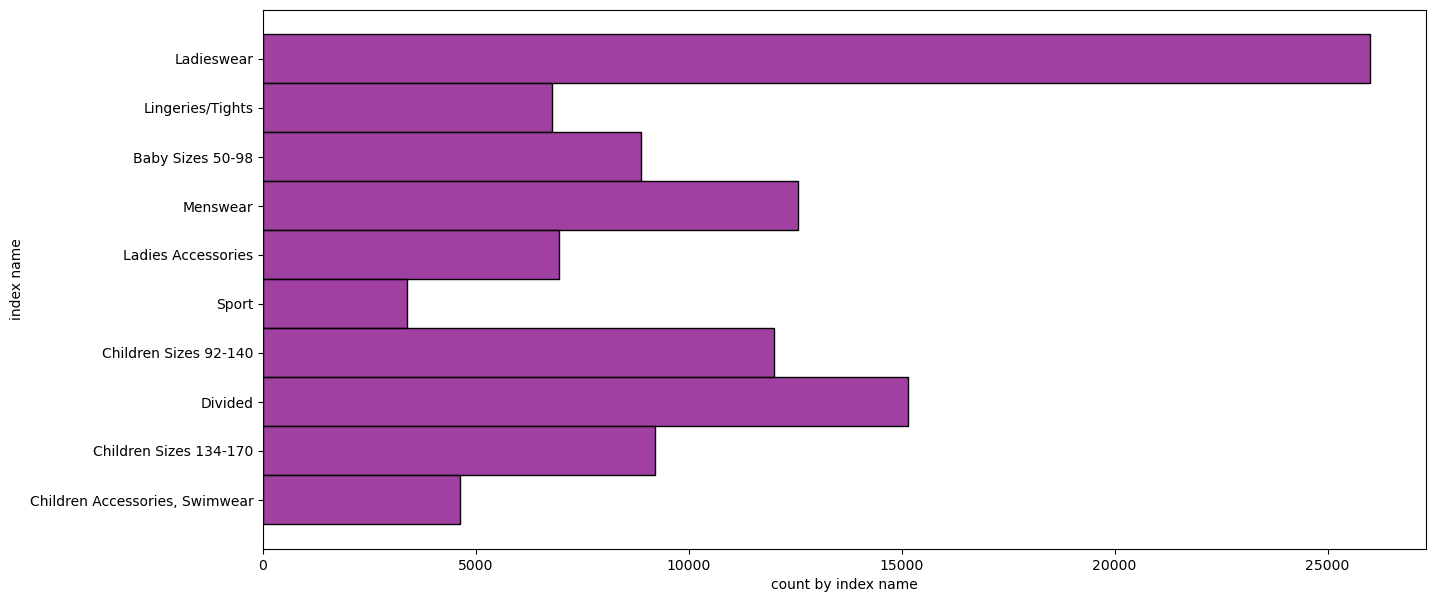

In [22]:
# plotting count of index name 
from collections import Counter
f, ax = plt.subplots(figsize=(15,7))
ax = sns.histplot(data=df, y='index_name',legend = False, color = 'purple')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')

plt.show()

In [58]:
# analysis of garment group name by index group name
df[['garment_group_name','index_group_name']].head()

,garment_group_name,index_group_name
0,Jersey Basic,Ladieswear
1,Jersey Basic,Ladieswear
2,Jersey Basic,Ladieswear
3,"Under-, Nightwear",Ladieswear
4,"Under-, Nightwear",Ladieswear


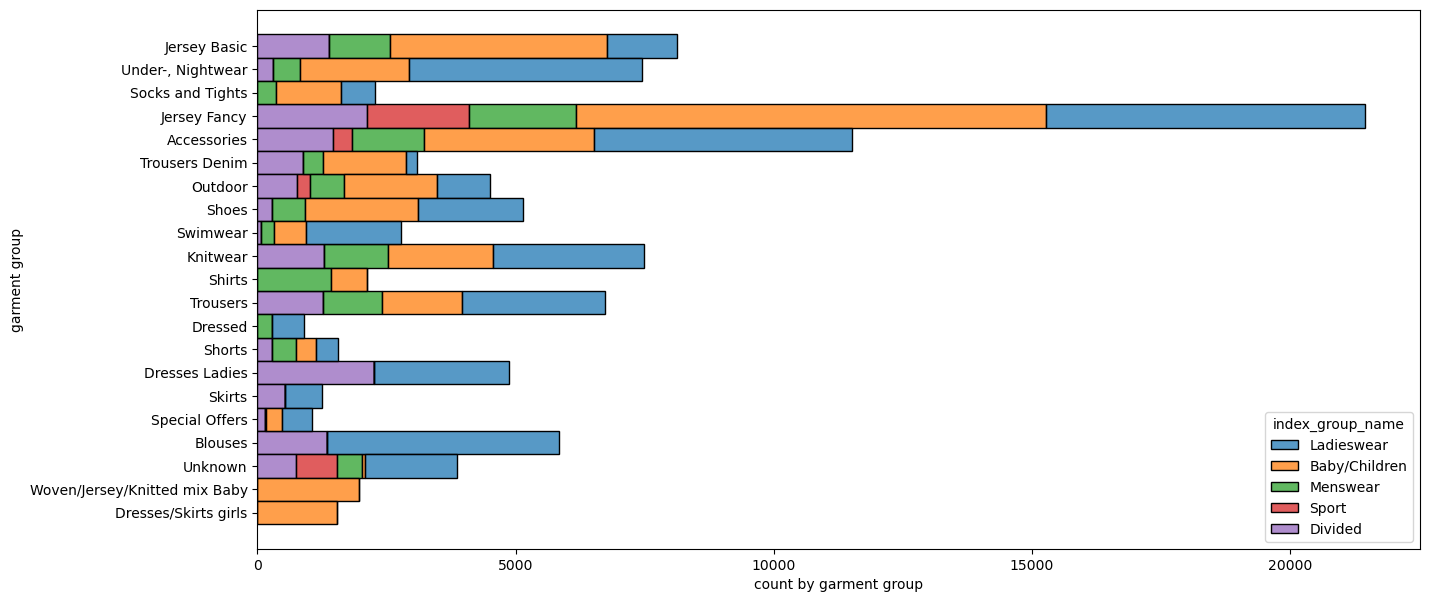

In [56]:
# plotting count of garment group with index group classification
f, ax = plt.subplots(figsize=(15,7))
ax = sns.histplot(data=df, y='garment_group_name', hue='index_group_name',multiple='stack')
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

**Comment** : Jersey Fancy is the most popular followed by Accessories. Highest sales in women and babies index group.

In [60]:
# index_group_name and its items by count
df.groupby(['index_group_name','index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [62]:
# types of product items
pd.options.display.max_rows = None
df.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [68]:
top_ten = df.groupby(['product_type_name']).count()['article_id'].sort_values(ascending=False).iloc[:10]
top_ten

product_type_name
Trousers    11169
Dress       10362
Sweater      9302
T-shirt      7904
Top          4155
Blouse       3979
Jacket       3940
Shorts       3939
Shirt        3405
Vest top     2991
Name: article_id, dtype: int64

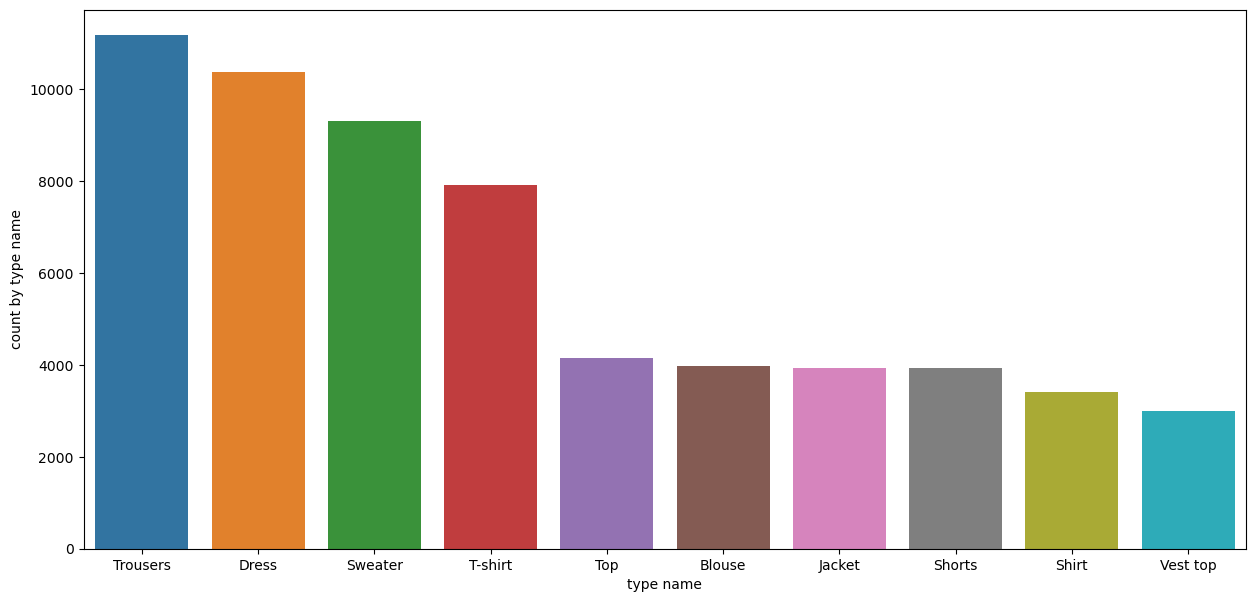

In [71]:
# top 10 types of items
f, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=top_ten.index, y=top_ten.values)
ax.set_xlabel('type name')
ax.set_ylabel('count by type name')
plt.show()

In [73]:
# finding top 10 categories
top_group = df.groupby(['product_group_name']).count()['article_id'].sort_values(ascending=False).iloc[:10]
top_group

product_group_name
Garment Upper body    42741
Garment Lower body    19812
Garment Full body     13292
Accessories           11158
Underwear              5490
Shoes                  5283
Swimwear               3127
Socks & Tights         2442
Nightwear              1899
Unknown                 121
Name: article_id, dtype: int64

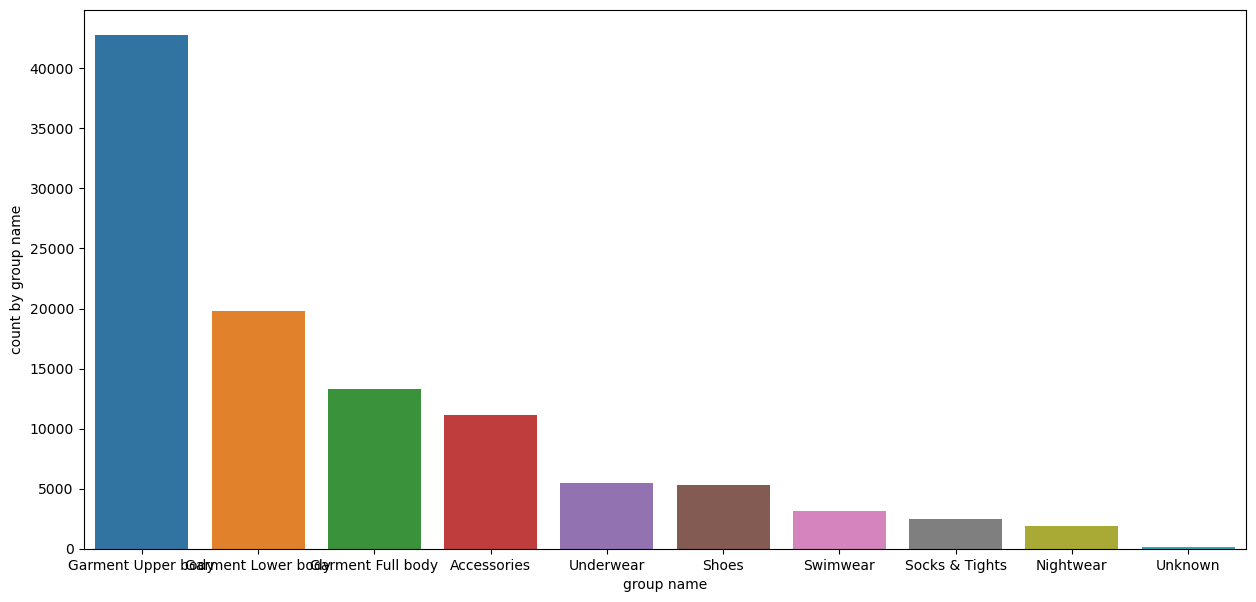

In [75]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=top_group.index, y=top_group.values)
ax.set_xlabel('group name')
ax.set_ylabel('count by group name')
plt.show()

In [79]:
# finding the top 10 graphical appearance
top_graph = df.groupby(['graphical_appearance_name']).count()['article_id'].sort_values(ascending=False).iloc[:10]
top_graph

graphical_appearance_name
Solid               49747
All over pattern    17165
Melange              5938
Stripe               4990
Denim                4842
Front print          3215
Placement print      3098
Check                2178
Colour blocking      1830
Lace                 1513
Name: article_id, dtype: int64

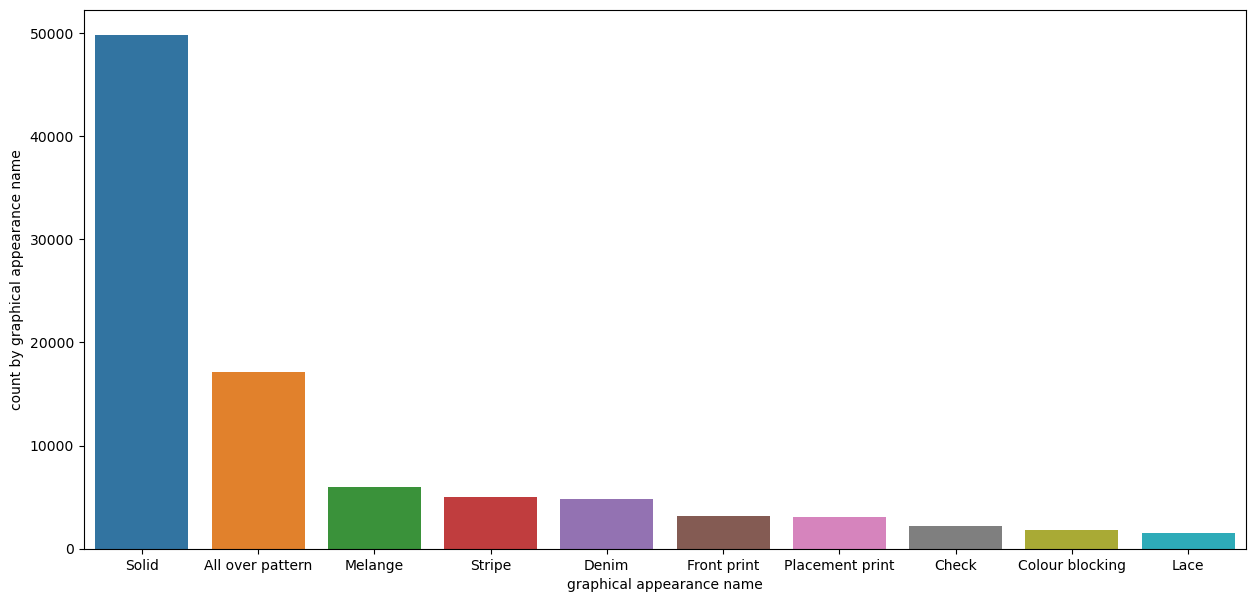

In [80]:
# plotting of count by graphical appearance
f, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=top_graph.index, y=top_graph.values)
ax.set_xlabel('graphical appearance name')
ax.set_ylabel('count by graphical appearance name')
plt.show()

In [81]:
# finding the top 10 colours
top_color = df.groupby(['colour_group_name']).count()['article_id'].sort_values(ascending=False).iloc[:10]
top_color

colour_group_name
Black             22670
Dark Blue         12171
White              9542
Light Pink         5811
Grey               4487
Light Beige        3356
Blue               3308
Red                3056
Light Blue         3012
Greenish Khaki     2767
Name: article_id, dtype: int64

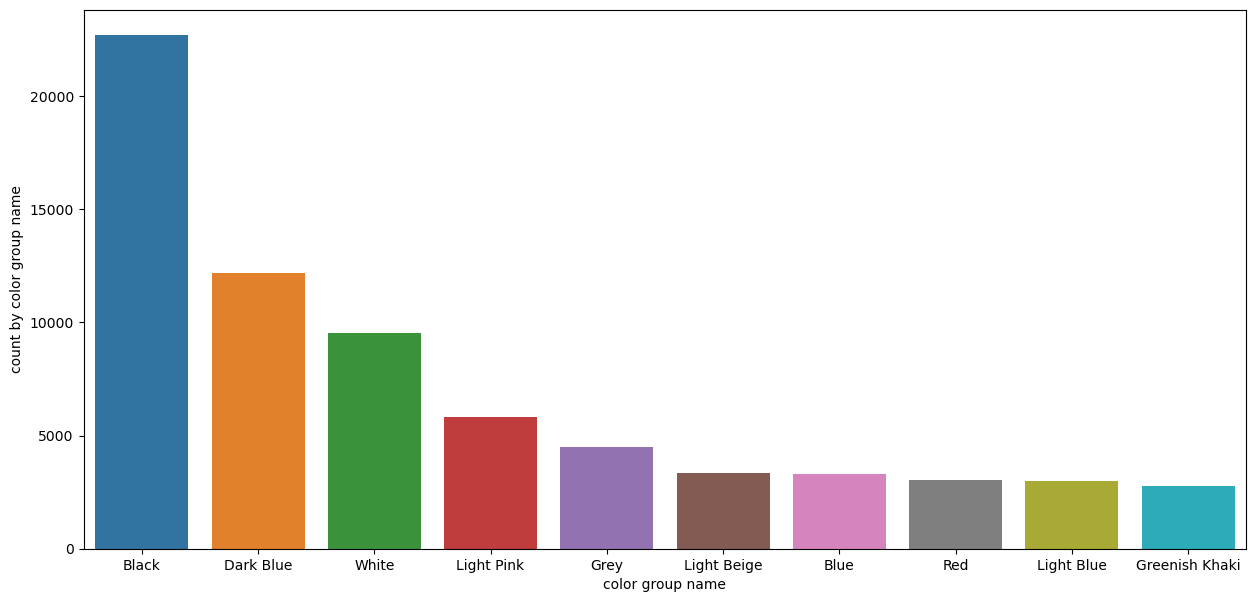

In [83]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=top_color.index, y=top_color.values)
ax.set_xlabel('color group name')
ax.set_ylabel('count by color group name')
plt.show()

## 2.2 Analysis of Customers data

In [84]:
pd.options.display.max_rows = 50
df_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


Customers data description
* customer_id : A unique identifier of every customer
* FN : 1 or missed (not clear what it is)
* Active : 1 or missed (need to check if it is linked to making purchases)
* club_member_status : Status in club
* fashion_news_frequency : How often H&M may send news to customer
* age : The current age
* postal_code : Postal code of customer

In [87]:
# checking of there are duplicates of customers
df_customers.shape[0] - df_customers['customer_id'].nunique()

0

In [89]:
# checking for postal code of customers
data_postal = df_customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


In [90]:
# checking out the postal code with most customers
data_postal['postal_code'].iloc[0]

'2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'

In [91]:
df_customers[df_customers['postal_code'] == '2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,NaN,ACTIVE,NONE,31.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


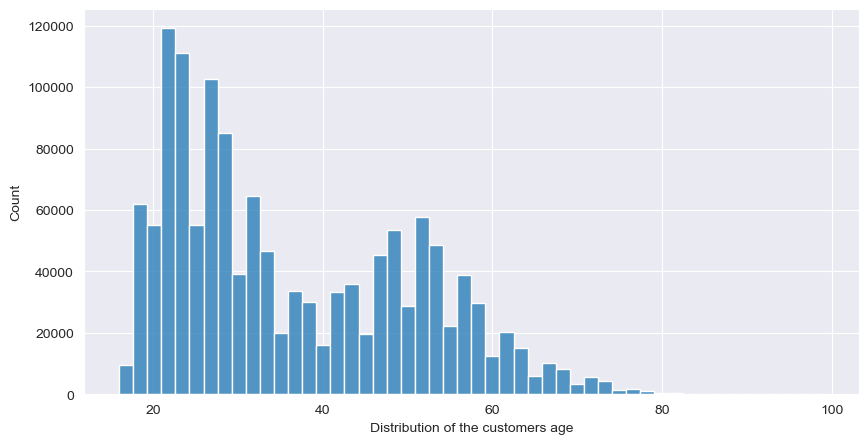

In [92]:
# age of customers
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (10,5))
ax = sns.histplot(data=df_customers, x='age', bins=50)
ax.set_xlabel('Distribution of the customers age')
plt.show()

**Comment**: The largest group of customers are in the 20 to 30 age range. The next largest group is in the 45 to 55 age range. 

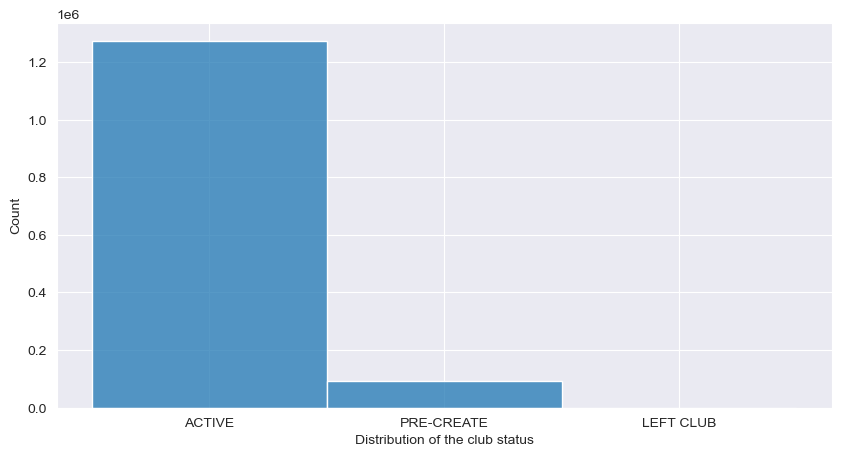

In [93]:
# analysis of club status
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (10,5))
ax = sns.histplot(data=df_customers, x='club_member_status')
ax.set_xlabel('Distribution of the club status')
plt.show()

In [95]:
# analysis of news frequency
df_customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [96]:
pie_data = df_customers[['customer_id','fashion_news_frequency']].groupby('fashion_news_frequency').count()
pie_data

,customer_id
fashion_news_frequency,
Monthly,842
NONE,877711
None,2
Regularly,477416


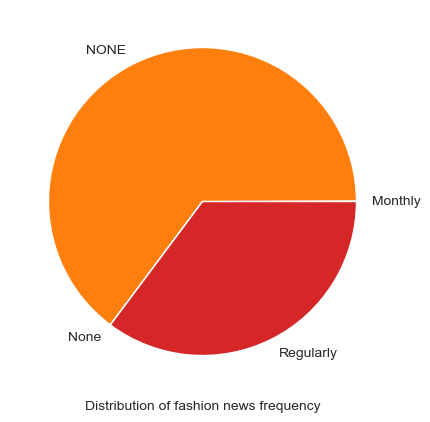

In [97]:
# analysis of fashion news frequency
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (10,5))
ax.pie(pie_data.customer_id, labels=pie_data.index)
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

**Comment**: Most customers do not receive fashion news

### Transactions

In [100]:
transactions_byid = df_transaction_train.groupby('customer_id').count()
transactions_byid

,t_dat,article_id,price,sales_channel_id
customer_id,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,21,21,21,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,86,86,86,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,18,18,18,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2,2,2,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,13,13,13,13
...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,51,51,51,51
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,84,84,84,84
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,45,45,45,45


In [102]:
# finding price of items bought by top 10 customers
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64

## Finding correlation between age and other variables

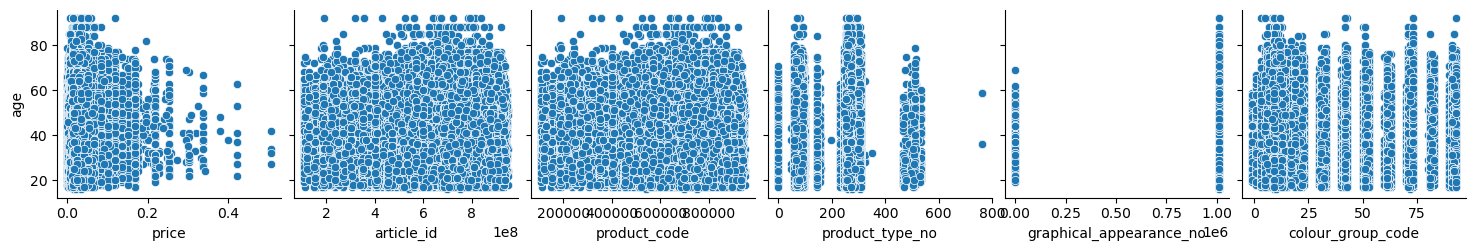

In [5]:
# Finding relationship between age and some variables
sns.pairplot(merged_df, x_vars=['price', 'article_id','product_code','product_type_no','graphical_appearance_no','colour_group_code'], y_vars=['age'])

**Comment**: Age and price seems to have a correlation. Most expensive item is bought by those aged between 30 to 40. Low priced items are bought
by people of all ages. As price increases, those outside the age range of 20 to 75 do not buy them.
As for relationship of age with article_id, product_code, product_type_no, graphical_appearance_no, colour_group_code, there is not much correlation.

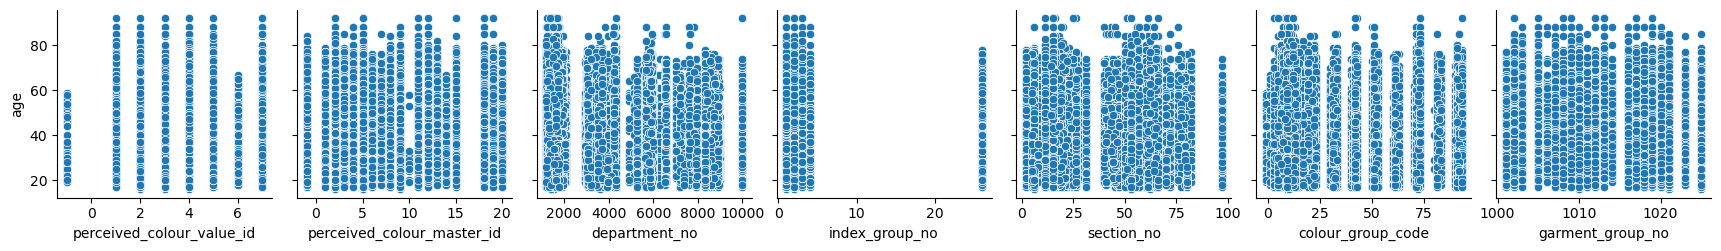

In [6]:
#Finding relationship between age and some variables
sns.pairplot(merged_df, x_vars=['perceived_colour_value_id', 'perceived_colour_master_id','department_no','index_group_no','section_no','colour_group_code','garment_group_no'], y_vars=['age'])

**Comment** : Age does not have much correlation with any of the above variables.

## Finding the top 10 postal code

In [10]:
#listing the top 10 postal codes
top_10_postal=merged_df['postal_code'].value_counts().sort_values(ascending= False).head(10)


In [8]:
top_10 = [x for x in top_10_postal.index]
top_10

['2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c',
 'b6cd6d4a8a029ceb76b9bb83781c4bfabd02fdf4253092d4d71558d281a75bac',
 '2d9e9bcad85872c8daf69692f0d0ee9598092523a47c7ad2b4fab7dab82cbbb7',
 'f335c7f717d7847ee02f859f6da2528587a41df09c66b98ae9e66f822f085935',
 'cc4d7b059c59d89e1641c232dbba5bea5716bd9e5e7d787bf61587a8ac1c4328',
 '03bd2d03d21274521ab544db506f70e73ab05766d476b4c5bf77d6bc66bcc105',
 'f7fe86ea77e2bd9c69c6c36a50a4bc52ea67cd29294e7f0b40bf70997290b17b',
 '663c69a6517b4c956e41006b92844ad269191c93466f535a94a8fc73a16b200f',
 'e956719429ab83056cc6bf8b940a4272bab92f528b3eba88773aef8d6e162d97',
 'bcec30d7883cb32a8e370319e96467cafc92a70e038a1a362772620e4ba2a6f2']

In [8]:
# Convert the postal codes into binary variables with top 10 ==1 and the rest ==0
for label in top_10:
    merged_df[label] = np.where(merged_df['postal_code']==label,1,0)
    
merged_df[['postal_code']+top_10].head(3)

NameError: name 'top_10' is not defined